### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [26]:
data = pd.read_csv('data/coupons.csv')

In [27]:

sample = data.sample(n=5)
sample
#unique_values = data['occupation'].unique()
#unique_values

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2097,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,26,Single,...,1~3,gt8,4~8,1~3,1,0,0,0,1,1
10627,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,21,Single,...,never,gt8,less1,less1,1,0,0,0,1,0
11549,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,31,Married partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
11970,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,50plus,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
830,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,50plus,Married partner,...,never,less1,1~3,less1,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [28]:
data.info()
print(data.isnull().sum())

print(data.isnull().mean() * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [49]:
data['Bar'] = data['Bar'].fillna('never')
data['car'] = data['car'].fillna('unknown')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
data['CarryAway'] = data['CarryAway'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')

4. What proportion of the total observations chose to accept the coupon?



In [50]:
data['Y'].value_counts(normalize=True) * 100

1    56.843267
0    43.156733
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

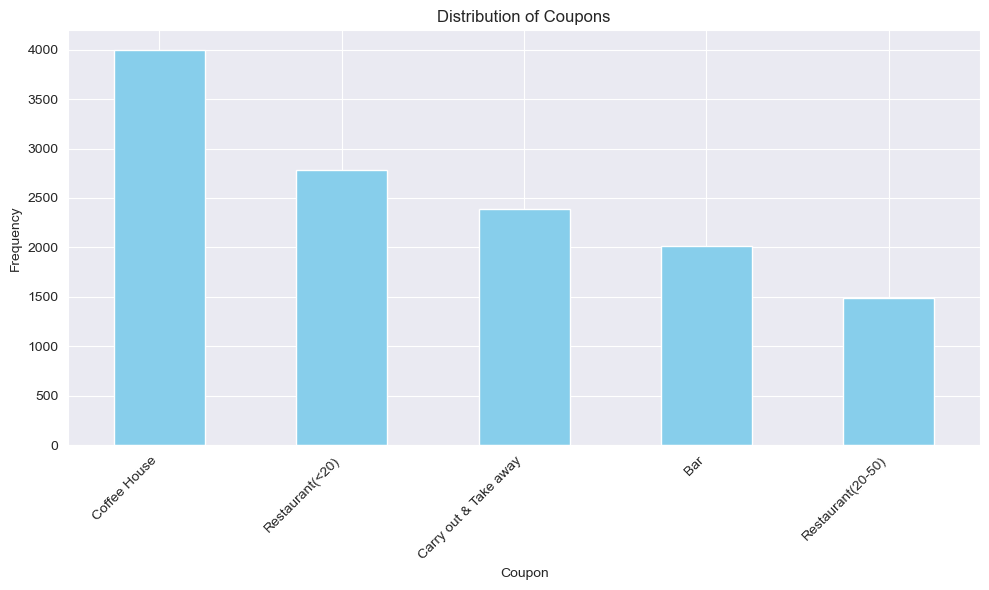

In [51]:
coupon_counts = data['coupon'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

6. Use a histogram to visualize the temperature column.

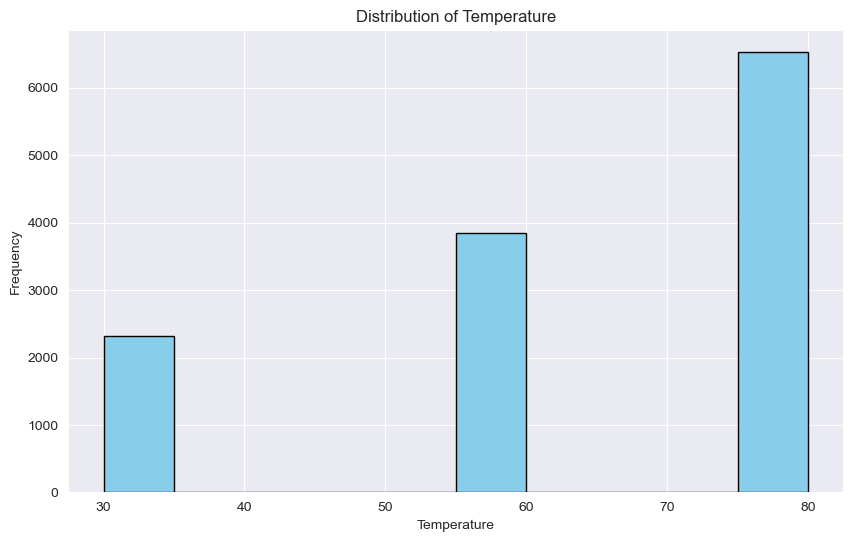

In [52]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(data['temperature'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

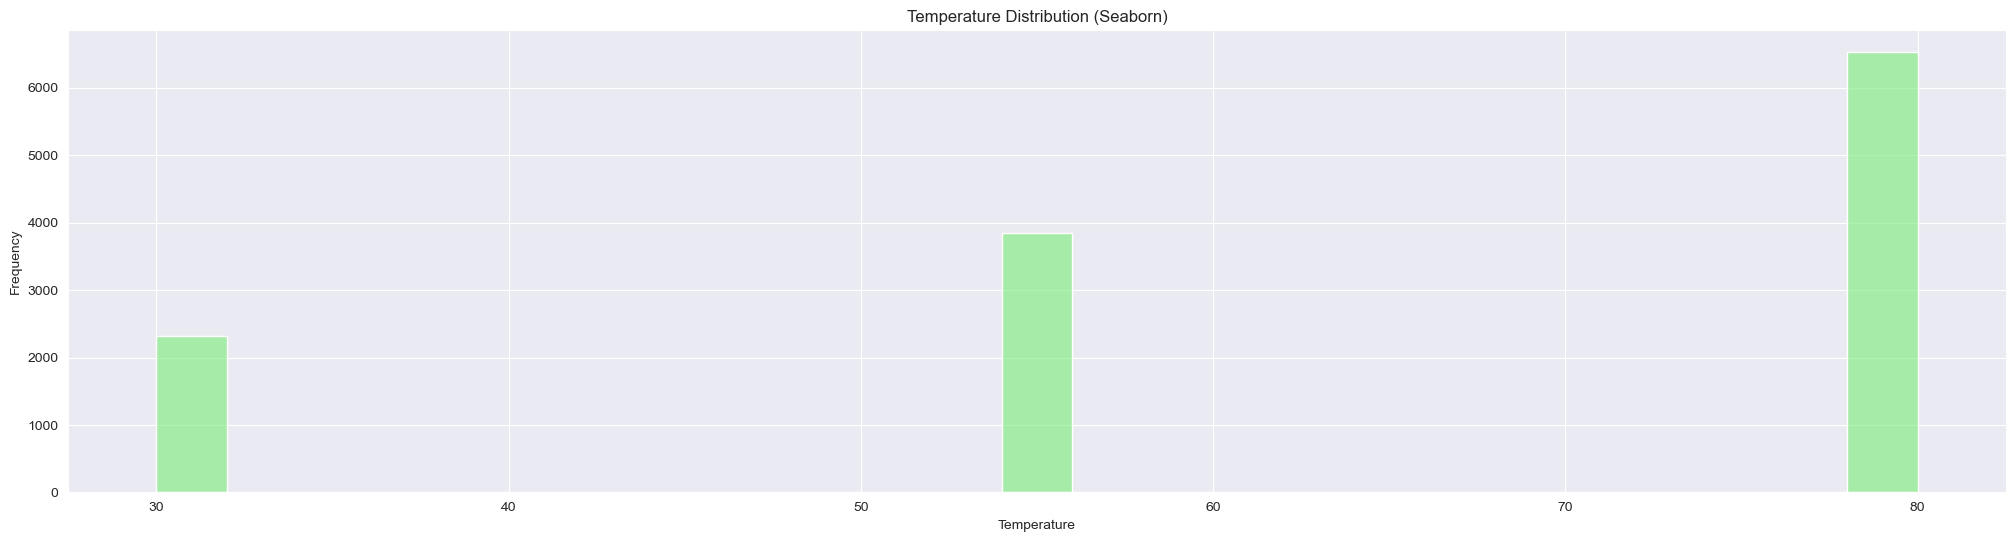

In [35]:
plt.figure(figsize=(25, 6))
sns.histplot(data['temperature'], bins=25, kde=False, color='lightgreen')
plt.title('Temperature Distribution (Seaborn)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
bar_coupon_data = data[data["coupon"] == 'Bar']
bar_coupon_data
# new_df = data[['Bar', 'Y']].copy()
# new_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Category,Age_Group,Combined_Category,Income_Group
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1,1,0,0,1,0,Once or less,25 or Under,Once or less - 25 or Under,Under 50K
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,0,0,1,0,1,Once or less,25 or Under,Once or less - 25 or Under,Under 50K
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,1,1,0,1,0,Once or less,25 or Under,Once or less - 25 or Under,Under 50K
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,0,0,0,1,1,Once or less,25 or Under,Once or less - 25 or Under,Over 50K
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,0,1,0,1,Once or less,25 or Under,Once or less - 25 or Under,Over 50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1,1,0,0,1,0,Once or less,Over 25,Once or less - Over 25,Over 50K
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1,1,0,0,1,0,Once or less,Over 25,Once or less - Over 25,Over 50K
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1,1,0,0,1,0,Once or less,Over 25,Once or less - Over 25,Over 50K
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1,1,0,0,1,0,Once or less,Over 25,Once or less - Over 25,Over 50K


2. What proportion of bar coupons were accepted?


0    58.998513
1    41.001487
Name: Y, dtype: float64


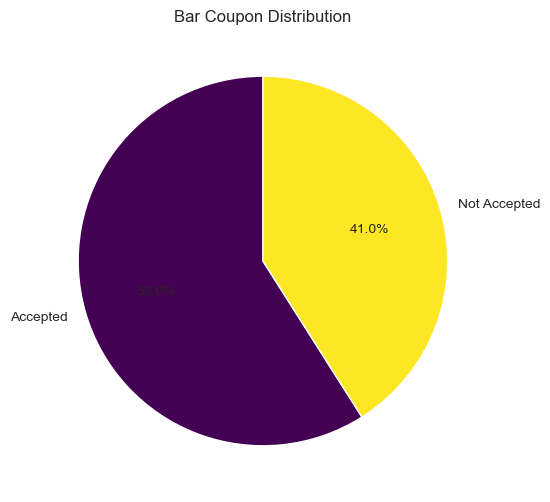

In [54]:

bar_coupon_distribution = bar_coupon_data['Y'].value_counts(normalize=True) * 100
print(bar_coupon_distribution)
bar_coupon_distribution.index = ['Accepted', 'Not Accepted']
plt.figure(figsize=(6, 6))
bar_coupon_distribution.plot.pie(
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start angle for better orientation
    cmap='viridis',     # Colormap for aesthetics
    ylabel=''           # Remove default y-axis label
)
plt.title("Bar Coupon Distribution")
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [55]:
data['Bar'] = data['Bar'].fillna('never')
data['Bar_Category'] = np.where(data['Bar'].isin(['never', 'less than 1', '1 to 3 times']), '3 or fewer times', 'More than 3 times')

# Group by 'Bar_Category' and calculate the acceptance rate for each group
acceptance_rate = data.groupby('Bar_Category')['Y'].value_counts(normalize=True) * 100

# Print the acceptance rate
print(acceptance_rate)

Bar_Category       Y
3 or fewer times   1    53.205128
                   0    46.794872
More than 3 times  1    59.457995
                   0    40.542005
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
# Create a new column 'Bar_Category' based on the 'Bar' column
data['Bar_Category'] = np.where(data['Bar'].isin(['1 to 3 times', '4 to 8 times', 'greater than 8']), 'More than once', 'Once or less')

# Create a new column 'Age_Group' based on the 'Age' column
#data['Age_Group'] = np.where(data['age'] > 25, 'Over 25', '25 or Under')
# Create a new column 'Age_Category' based on the 'Age' column
data['Age_Group'] = np.where(data['age'].isin(['26', '31', '41', '50plus', '36']), 'Over 25', '25 or Under')


# Combine 'Bar_Category' and 'Age_Group' into a single column 'Combined_Category'
data['Combined_Category'] = data['Bar_Category'] + ' - ' + data['Age_Group']

# Calculate the acceptance rate for the specific group (More than once - Over 25)
over25_group_acceptance = data[data['Combined_Category'] == 'More than once - Over 25']['Y'].value_counts(normalize=True) * 100

# Calculate the acceptance rate for all other groups
below25_groups_acceptance = data[data['Combined_Category'] != 'More than once - Over 25']['Y'].value_counts(normalize=True) * 100

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over 25:")
print(over25_group_acceptance)

print("\nAcceptance rate for all other drivers:")
print(below25_groups_acceptance)

Acceptance rate for drivers who go to a bar more than once a month and are over 25:
Series([], Name: Y, dtype: float64)

Acceptance rate for all other drivers:
1    56.843267
0    43.156733
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [57]:
# Create a new column 'Bar_Category' based on the 'Bar' column
data['Bar_Category'] = np.where(data['Bar'].isin(['1 to 3 times', '4 to 8 times', 'greater than 8']), 'More than once', 'Once or less')

# Create a new column 'Age_Group' based on the 'Age' column
#data['Age_Group'] = np.where(data['age'] > 25, 'Over 25', '25 or Under')
# Create a new column 'Age_Category' based on the 'Age' column
data['Age_Group'] = np.where(data['passanger'].isin(['Kid(s)']), 'With Kid', 'Without Kid')
data['FFF_Group'] = np.where(data['occupation'].isin(['Farming Fishing & Forestry']), 'FFF', 'Without FFF')

# Combine 'Bar_Category' and 'Age_Group' into a single column 'Combined_Category'
data['Combined_Category'] = data['Bar_Category'] + ' - ' + data['Age_Group'] + ' - ' + data['FFF_Group']
# Calculate the acceptance rate for the specific group (More than once - Over 25)
without_kid_fff_group_acceptance = data[data['Combined_Category'] == 'More than once - Without Kid - Without FFF']['Y'].value_counts(normalize=True) * 100

# Calculate the acceptance rate for all other groups
not_without_kid_fff_groups_acceptance = data[data['Combined_Category'] != 'More than once - Without Kid - Without FFF']['Y'].value_counts(normalize=True) * 100

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and without a kid, and not fff:")
print(without_kid_fff_group_acceptance)

print("\nAcceptance rate for all other drivers:")
print(not_without_kid_fff_groups_acceptance)


Acceptance rate for drivers who go to a bar more than once a month and without a kid, and not fff:
Series([], Name: Y, dtype: float64)

Acceptance rate for all other drivers:
1    56.843267
0    43.156733
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [58]:
data['Bar_Category'] = np.where(data['Bar'].isin(['1 to 3 times', '4 to 8 times', 'greater than 8']), 'More than once', 'Once or less')
data['Age_Group'] = np.where(data['passanger'].isin(['Kid(s)']), 'With Kid', 'Without Kid')
data['MaritalStatus_Group'] = np.where(data['maritalStatus'].isin(['Widowed']), 'Widowed', 'Not Widowed')

# Combine 'Bar_Category' and 'Age_Group' into a single column 'Combined_Category'
data['Combined_Category'] = data['Bar_Category'] + ' - ' + data['Age_Group'] + ' - ' + data['MaritalStatus_Group']
without_kid_widowed_group_acceptance = data[data['Combined_Category'] == 'More than once - Without Kid - Widowed']['Y'].value_counts(normalize=True) * 100

# Calculate the acceptance rate for all other groups
not_without_kid_widowed_groups_acceptance = data[data['Combined_Category'] != 'More than once - Without Kid - Widowed']['Y'].value_counts(normalize=True) * 100

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month, passenger not a kid, and widowed:")
print(without_kid_widowed_group_acceptance)

print("\nAcceptance rate for all other drivers:")
print(not_without_kid_widowed_groups_acceptance)


Acceptance rate for drivers who go to a bar more than once a month, passenger not a kid, and widowed:
Series([], Name: Y, dtype: float64)

Acceptance rate for all other drivers:
1    56.843267
0    43.156733
Name: Y, dtype: float64


In [21]:
data['Bar_Category'] = np.where(data['Bar'].isin(['1 to 3 times', '4 to 8 times', 'greater than 8']), 'More than once', 'Once or less')
data['Age_Group'] = np.where(data['age'].isin(['31', '41', '50plus', '36']), 'Over 30', '30 or Under')


# Combine 'Bar_Category' and 'Age_Group' into a single column 'Combined_Category'
data['Combined_Category'] = data['Bar_Category'] + ' - ' + data['Age_Group'] 
over30_group_acceptance = data[data['Combined_Category'] == 'More than once - Over 30']['Y'].value_counts(normalize=True) * 100

# Calculate the acceptance rate for all other groups
under30_group_acceptance = data[data['Combined_Category'] != 'More than once - Over 30']['Y'].value_counts(normalize=True) * 100

# Print the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and age over 30:")
print(over30_group_acceptance)

print("\nAcceptance rate for all other drivers:")
print(under30_group_acceptance)

Acceptance rate for drivers who go to a bar more than once a month and age over 30:
Series([], Name: Y, dtype: float64)

Acceptance rate for all other drivers:
1    56.843267
0    43.156733
Name: Y, dtype: float64


In [59]:

data['Bar_Category'] = np.where(data['RestaurantLessThan20'].isin(['4 - 8', 'gt8']), 'More than 4 times', 'Less than 4 times')

data['Income_Group'] = np.where(data['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']), 'Over 50K', 'Under 50K')

# Combine 'Bar_Category' and 'Age_Group' into a single column 'Combined_Category'
data['Combined_Category'] = data['Bar_Category'] + ' - ' + data['Income_Group']
over50k_group_acceptance = data[data['Combined_Category'] == 'More than 4 times - Over 50K']['Y'].value_counts(normalize=True) * 100

# Calculate the acceptance rate for all other groups
under50k_group_acceptance = data[data['Combined_Category'] != 'More than 4 times - Over 50K']['Y'].value_counts(normalize=True) * 100

# Print the acceptance rates
print("Acceptance rate for drivers who go to a cheap restaurant more than 4 times a month, and whose salary is less than 50K:")
print(over50k_group_acceptance)

print("\nAcceptance rate for all other drivers:")
print(under50k_group_acceptance)

Acceptance rate for drivers who go to a cheap restaurant more than 4 times a month, and whose salary is less than 50K:
1    54.723127
0    45.276873
Name: Y, dtype: float64

Acceptance rate for all other drivers:
1    56.951118
0    43.048882
Name: Y, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

People who have a kid or is widowed dont want to accept the coupon, 30 and over people are not interested in the coupon, More people accepted the coupon who earned less than 50K and went to bar more than 4 time per month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

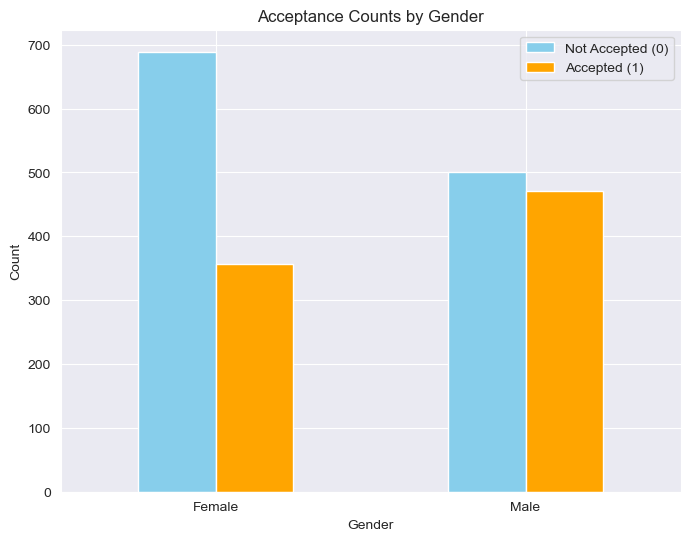

In [46]:


grouped_data = bar_coupon_data.groupby(['gender', 'Y'])['Y'].count().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'orange'])

plt.title('Acceptance Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Accepted (0)', 'Accepted (1)'])
plt.xticks(rotation=0)
plt.show()


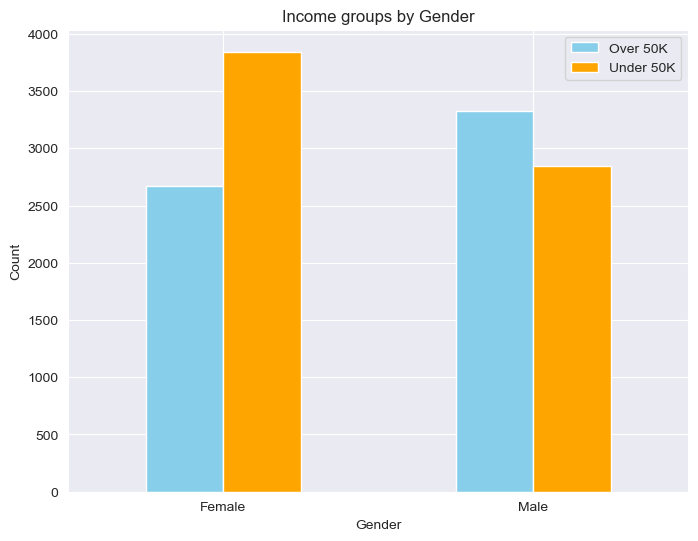

In [48]:
data['Income_Group'] = np.where(data['income'].isin(['$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']), 'Over 50K', 'Under 50K')
grouped_data = data.groupby(['gender', 'Income_Group'])['gender'].count().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'orange'])

plt.title('Income groups by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Over 50K', 'Under 50K'])
plt.xticks(rotation=0)
plt.show()
